In [1]:
from pandas import Series, DataFrame
import pandas as pd
import re
pd.options.mode.chained_assignment = None  # default='warn'
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fake = pd.read_csv("fake_job_postings.csv")

In [3]:
fake = fake.fillna('')
#fake = fake.fillna(-1)

In [4]:
LocationList = list(fake['location'].values)

In [5]:
def getCountryName(s):
    l = s.split(', ')
    CountryName = l[0]
    return CountryName

In [6]:
fake['country name'] = fake['location'].map(getCountryName)

In [7]:
fake

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country name
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,US
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,,Computer Software,Sales,0,CA
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,0,0,Full-time,,,,,0,US
17878,17879,Graphic Designer,"NG, LA, Lagos",,,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,NG


In [8]:
fraud = fake['fraudulent'] == 1

In [9]:
len(fake[fraud])

866

In [10]:
legit = fake['fraudulent'] == 0

In [11]:
len(fake[legit])

17014

In [12]:
fake['location'] = fake['location'].str.lower()

In [13]:
legit_by_loc = fake[legit]['location'].value_counts()

In [14]:
legit_by_country = fake[legit]['country name'].value_counts()

In [15]:
fraud_by_loc = fake.groupby(['location'])[['fraudulent']].agg('sum')

fraud_by_loc = fraud_by_loc.sort_values(by = 'fraudulent', ascending = False)

fraud_by_loc = fraud_by_loc.reset_index()

fraud_by_loc['location'] = fraud_by_loc['location'].str.upper()

fraud_by_loc = fraud_by_loc.set_index('location')

fraud_by_loc

,fraudulent
location,
"US, TX, HOUSTON",94
"AU, NSW, SYDNEY",31
"US, CA, LOS ANGELES",29
"US, ,",28
"US, CA, BAKERSFIELD",24
...,...
"MX, DIF, D.F.",0
"MX, DIF, MEXICO",0
"MX, DIF, MEXICO CITY",0


In [16]:
fraud_by_country = fake.groupby(['country name'])[['fraudulent']].agg('sum')

fraud_by_country = fraud_by_country.sort_values(by = 'fraudulent', ascending = False)

fraud_by_country = fraud_by_country.reset_index()

fraud_by_country['country name'] = fraud_by_country['country name'].str.upper()

fraud_by_country = fraud_by_country.set_index('country name')

fraud_by_country

,fraudulent
country name,
US,730
AU,40
GB,23
,19
MY,12
...,...
HU,0
HR,0
HK,0


In [17]:
legit_by_loc

gb, lnd, london            728
us, ny, new york           650
gr, i, athens              472
us, ca, san francisco      469
                           327
                          ... 
ru, ,                        1
us, il, lombard              1
gb, , stockholm, sweden      1
us, ut, hurricane            1
us, mi, battle creek         1
Name: location, Length: 2780, dtype: int64

In [18]:
legit_by_country

US    9926
GB    2361
GR     940
CA     445
DE     383
      ... 
CO       1
MA       1
GH       1
UG       1
AL       1
Name: country name, Length: 91, dtype: int64

In [19]:
legit_by_loc = legit_by_loc.rename_axis(['fraudulent']).reset_index()

legit_by_loc.columns = ['location', 'not fraudulent']

legit_by_loc['location'] = legit_by_loc['location'].str.upper()

legit_by_loc = legit_by_loc.set_index('location')

legit_by_loc

,not fraudulent
location,
"GB, LND, LONDON",728
"US, NY, NEW YORK",650
"GR, I, ATHENS",472
"US, CA, SAN FRANCISCO",469
,327
...,...
"RU, ,",1
"US, IL, LOMBARD",1
"GB, , STOCKHOLM, SWEDEN",1


In [20]:
legit_by_country = legit_by_country.rename_axis(['fraudulent']).reset_index()

legit_by_country.columns = ['country name', 'not fraudulent']

legit_by_country['country name'] = legit_by_country['country name'].str.upper()

legit_by_country = legit_by_country.set_index('country name')

legit_by_country

,not fraudulent
country name,
US,9926
GB,2361
GR,940
CA,445
DE,383
...,...
CO,1
MA,1
GH,1


In [21]:
relative_fraud = fraud_by_loc['fraudulent'] / legit_by_loc['not fraudulent']

relative_fraud = relative_fraud.rename_axis(['location']).reset_index()

relative_fraud.columns = ['location', 'relative fraud']

relative_fraud['location'] = relative_fraud['location'].str.upper()

relative_fraud = relative_fraud.set_index('location')

relative_fraud = relative_fraud.sort_values(by = 'relative fraud', ascending = False)

relative_fraud

,relative fraud
location,
"US, CA, BAKERSFIELD",12.0
"MY, ,",7.0
"US, WA,",3.0
"BH, 13,",2.0
"IN, , HYDERABAD",2.0
...,...
"US, WA, ABERDEEN",NaN
"US, WI, ABBOTSFORD",NaN
"US, WI, APPLETON",NaN


In [22]:
most_relative_fraud = relative_fraud[relative_fraud['relative fraud'] >= 0.9]

most_relative_fraud

,relative fraud
location,
"US, CA, BAKERSFIELD",12.000000
"MY, ,",7.000000
"US, WA,",3.000000
"BH, 13,",2.000000
"IN, , HYDERABAD",2.000000
"US, MI, FARMINGTON HILLS",2.000000
"GB, EAW, LONDON",2.000000
"QA, DA,",1.500000
"US, MD, HAGERSTOWN",1.000000


Text(0.5, 0, 'relative fraudulent job postings')

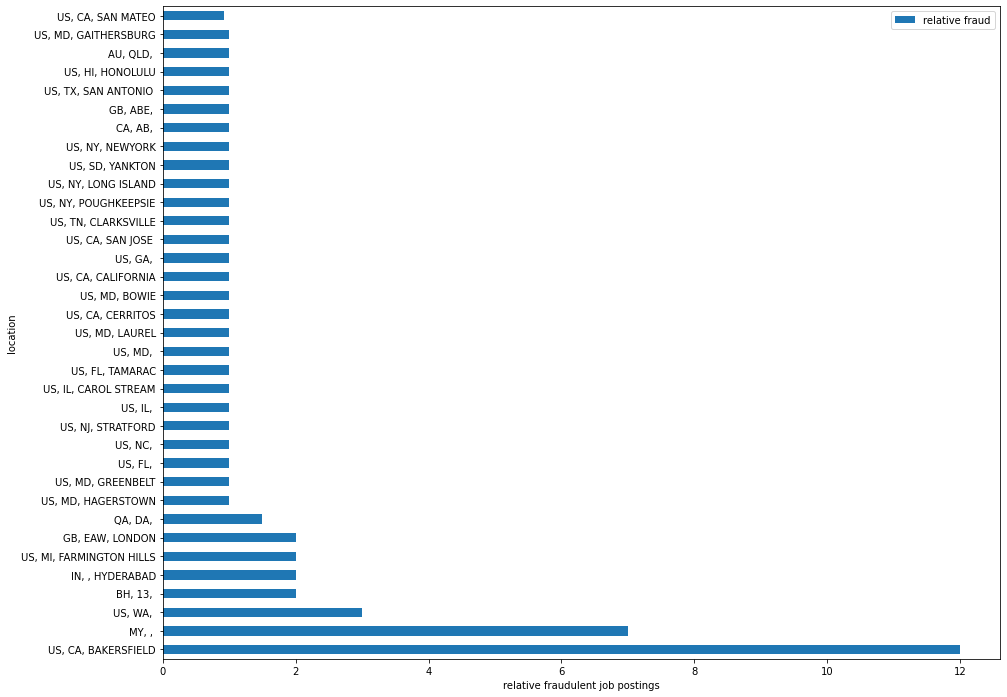

In [23]:
most_relative_fraud.plot(kind = 'barh', figsize = (15,12))
xlabel('relative fraudulent job postings')

Text(0.5, 0, 'non-fraudulent job postings')

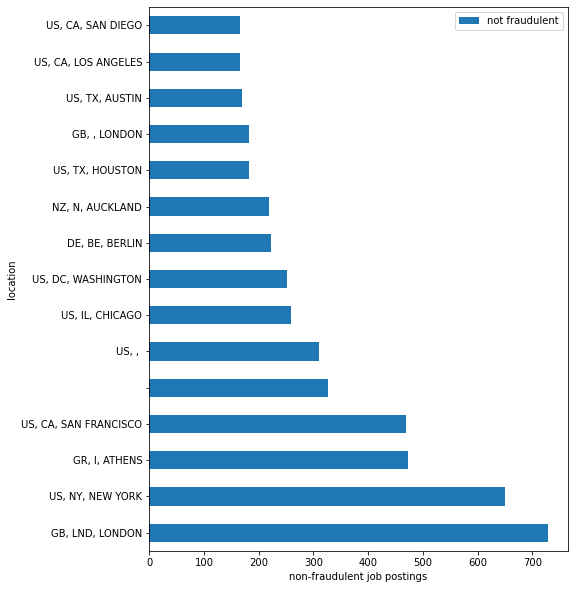

In [24]:
legit_by_loc[:15].plot(kind = 'barh', figsize = (7.5,10))
xlabel('non-fraudulent job postings')

Text(0.5, 0, 'fraudulent job postings')

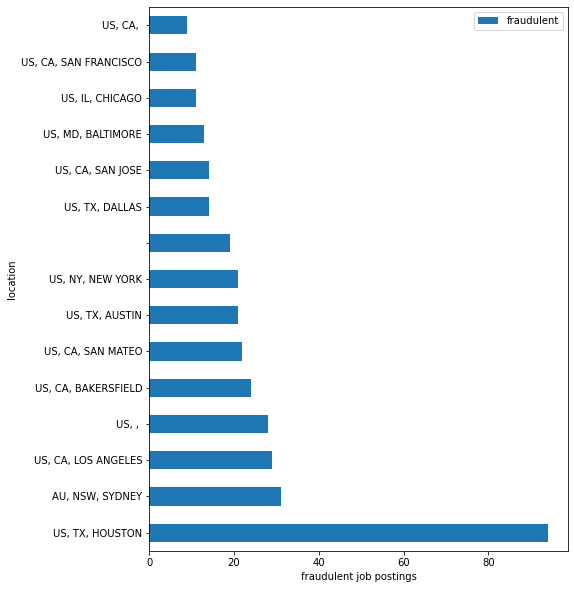

In [25]:
fraud_by_loc[:15].plot(kind = 'barh', figsize = (7.5,10))
xlabel('fraudulent job postings')

In [26]:
relative_fraud_country = fraud_by_country['fraudulent'] / legit_by_country['not fraudulent']

relative_fraud_country = relative_fraud_country.rename_axis(['country name']).reset_index()

relative_fraud_country.columns = ['country name', 'relative fraud']

relative_fraud_country['country name'] = relative_fraud_country['country name'].str.upper()

relative_fraud_country = relative_fraud_country.set_index('country name')

relative_fraud_country = relative_fraud_country.sort_values(by = 'relative fraud', ascending = False)

relative_fraud_country

,relative fraud
country name,
MY,1.333333
BH,1.250000
TW,1.000000
QA,0.400000
AU,0.229885
...,...
HU,0.000000
HR,0.000000
HK,0.000000


In [27]:
most_relative_fraud_country = relative_fraud_country[relative_fraud_country['relative fraud'] >= 0.01]

most_relative_fraud_country

,relative fraud
country name,
MY,1.333333
BH,1.250000
TW,1.000000
QA,0.400000
AU,0.229885
ID,0.083333
US,0.073544
SA,0.071429
,0.058104


Text(0.5, 0, 'relative fraudulent job postings')

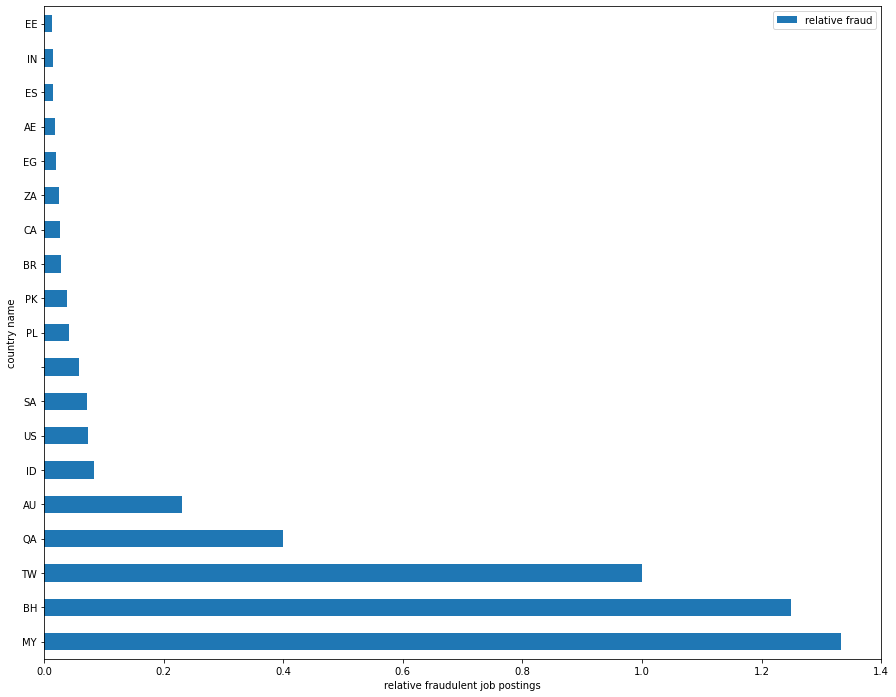

In [28]:
most_relative_fraud_country.plot(kind = 'barh', figsize = (15,12))
xlabel('relative fraudulent job postings')

Text(0.5, 0, 'non-fraudulent job postings')

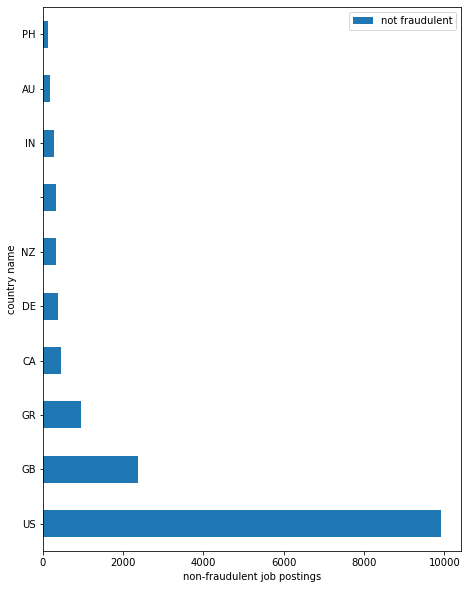

In [29]:
legit_by_country[:10].plot(kind = 'barh', figsize = (7.5,10))
xlabel('non-fraudulent job postings')

Text(0.5, 0, 'fraudulent job postings')

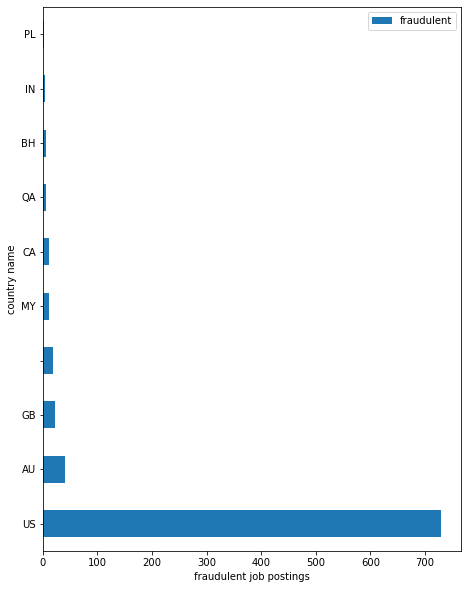

In [30]:
fraud_by_country[:10].plot(kind = 'barh', figsize = (7.5,10))
xlabel('fraudulent job postings')

In [31]:
normalized_fraud = (fraud_by_loc['fraudulent'] - fraud_by_loc['fraudulent'].mean()) / fraud_by_loc['fraudulent'].std()

normalized_fraud = normalized_fraud.rename_axis(['location']).reset_index()

normalized_fraud.columns = ['location', 'normalized fraud']

normalized_fraud = normalized_fraud.set_index('location')

#normalized_fraud

In [32]:
most_normalized_fraud = normalized_fraud[normalized_fraud['normalized fraud'] >= 2]

#most_normalized_fraud

Text(0.5, 0, 'normalized fraud')

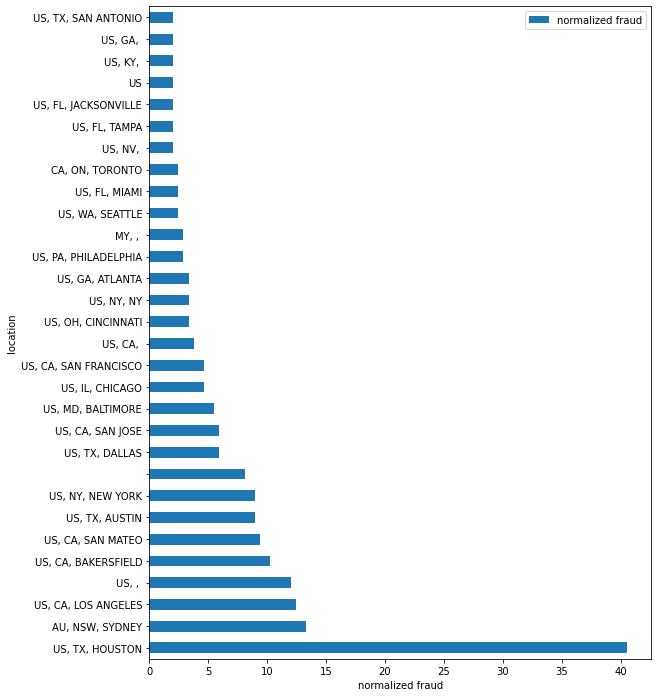

In [33]:
most_normalized_fraud.plot(kind = 'barh', figsize = (9,12))
xlabel('normalized fraud')

In [34]:
normalized_legit = (legit_by_loc['not fraudulent'] - legit_by_loc['not fraudulent'].mean()) / legit_by_loc['not fraudulent'].std()

normalized_legit = normalized_legit.rename_axis(['location']).reset_index()

normalized_legit.columns = ['location', 'normalized legit']

normalized_legit = normalized_legit.set_index('location')

#normalized_legit

In [35]:
most_normalized_legit = normalized_legit[normalized_legit['normalized legit'] >= 2]

#most_normalized_legit

Text(0.5, 0, 'normalized legit')

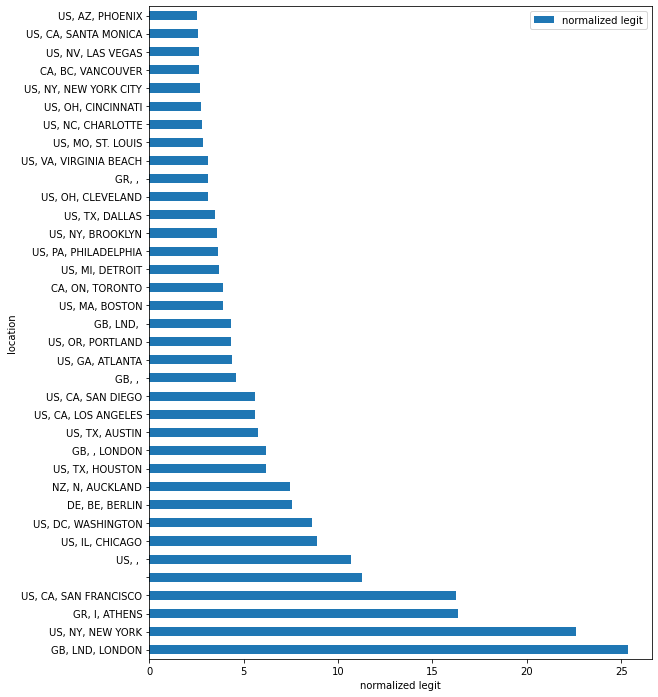

In [36]:
most_normalized_legit.plot(kind = 'barh', figsize = (9,12))
xlabel('normalized legit')